In [143]:
%matplotlib inline
import numpy as np

In [144]:
import matplotlib.pyplot as plt

In [145]:
import katarchive
#import katdal as katfile
#import katfile
import datetime

import logging
logging.root.setLevel(logging.ERROR)
katarchive.product_filter.only_ar1()


In [146]:
def findproj(text):
    chx=text.find('--pro')  # matches 'project-id and proposal-id'
    if chx >0  :
        pr2=text[chx+13:chx+40].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        found='Unknown'
    return found


In [147]:
def channels(details):
    ch32k="32768"
    mode="4k" # default
    if ch32k in details:
        mode="32k"
    return mode


In [148]:
begindate="27/04/2018"
#projectname="20130905MS-01"
#projectname="20141111-CR01"
#projectname="20150317AR-01"
lastday="02/05/2018" # arbitary in future

In [149]:
#today=datetime.datetime.today()
#print today
#end=today.strftime(format="%d/%m/%Y")


In [150]:
#print katarchive.search_archive(startdate=begindate,enddate=end)


In [151]:
f = katarchive.search_archive(startdate=begindate,enddate=lastday)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(MeerKATAR1TelescopeProduct) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2018-04-26T22:00:00Z TO 2018-05-02T21:59:59Z]
Returning 52 results


In [152]:
print 'First file in run: ' , start.isoformat()
print 'Last file in run: ' , end.isoformat()

First file in run:  2018-04-27T05:01:49
Last file in run:  2018-05-02T10:22:56


In [153]:
def findproj(text):
    chx=text.find('--pro')  # matches 'project-id and proposal-id'
    if chx >0  :
        pr2=text[chx+13:chx+40].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        found='Unknown'
    return found


In [154]:
def fproj(f,p):
    total=0.0
    for fi in f:
        txts=fi.metadata.InstructionSet
        p=findproj(txts)
        #print txts
        #print p
        if  projectname in p:  
            #print "Found",p,"======================="
            total=total+fi.metadata.Duration
            print ("%s %s %6.2f") %(p,fi.metadata.StartTime, fi.metadata.Duration/3600.)
    print "Total",total/3600., "Hours"


In [155]:
projectname="20170914RD-01"

In [156]:
fproj(f,"20170914RD-01")

Total 0.0 Hours


Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [157]:
total=0.0
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    #print p
    if  projectname in p:  
        #print "Found",p,"======================="
        total=total+fi.metadata.Duration
        print ("%s %s %6.2f") %(p,fi.metadata.StartTime, fi.metadata.Duration/3600.)
        
print "Total",total/3600., "Hours"


Total 0.0 Hours


In [158]:
print fi.metadata.Duration/3600.


0.569758333333


In [159]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    if p == "0170914RD-01": # for typo
        p="20170914RD-01"
    sbd.append(fi.metadata.ExperimentID)
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))


In [160]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

#p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

#print 'Percentage system usage: ', np.floor(p_cent),'%'


In [161]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

20180223MB-01 6.27
MKAIV-393 7.44
20170317SS-01 6.75
20180213RK-01 12.21
circinus 2.45
20170313LM-01 2.0
20180329TM-01 10.3
MKAIV-232 6.05
20180212BH-01 3.01


In [162]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1f %d") %(a_id[i],a_time[i],ants[i])

20170313LM-01      2.0 16
20170317SS-01      6.8 16
20180212BH-01      3.0 16
20180213RK-01     12.2 16
20180223MB-01      6.3 16
20180329TM-01     10.3 16
MKAIV-232          6.0 16
MKAIV-393          7.4 16
circinus           2.5 16


Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

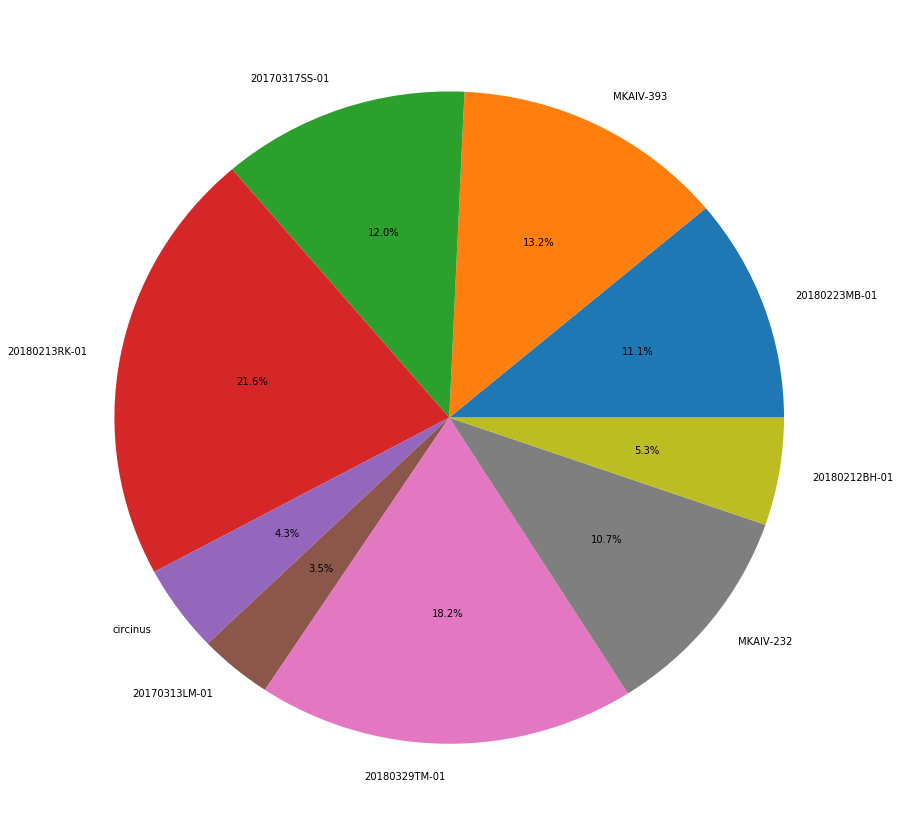

In [163]:
plt.figure(figsize=(15,15))
plt.pie(a_time,labels=a_id,autopct='%1.1f%%');

In [164]:
plt.show()

In [165]:
len(antsd)

21

In [166]:
allobs=0
numberofn=[]
for nant in range(1,64): # from 1 to 64 antennas
    if antsd.count(nant) > 0 :
        print nant, antsd.count(nant)       # how many have that count
        numberofn.append(antsd.count(nant))
        allobs=allobs+antsd.count(nant)
print numberofn
print nant
            

16 11
51 4
61 6
[11, 4, 6]
63


In [167]:
labs=[]
for n in range(63):
    labs.append(str(n+1)+" Antennas")

#cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 63
#colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','orange','cyan']
y=np.array(numberofn)
plt.figure(figsize=(15,15))
plt.pie(y,labels=labs,colors=colors, autopct='%1.1f%%')
plt.show()

SyntaxError: invalid syntax (<ipython-input-167-5033e865796e>, line 8)